In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
boston = load_boston()
boston.keys()

C:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
boston.data_module

'sklearn.datasets.data'

In [4]:
bostondf = pd.DataFrame(boston.data,columns=boston.feature_names)

In [5]:
bostondf['PRICE'] = boston.target

In [6]:
bostondf.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [7]:
bostondf.shape

(506, 14)

In [8]:
bostondf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
bostondf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

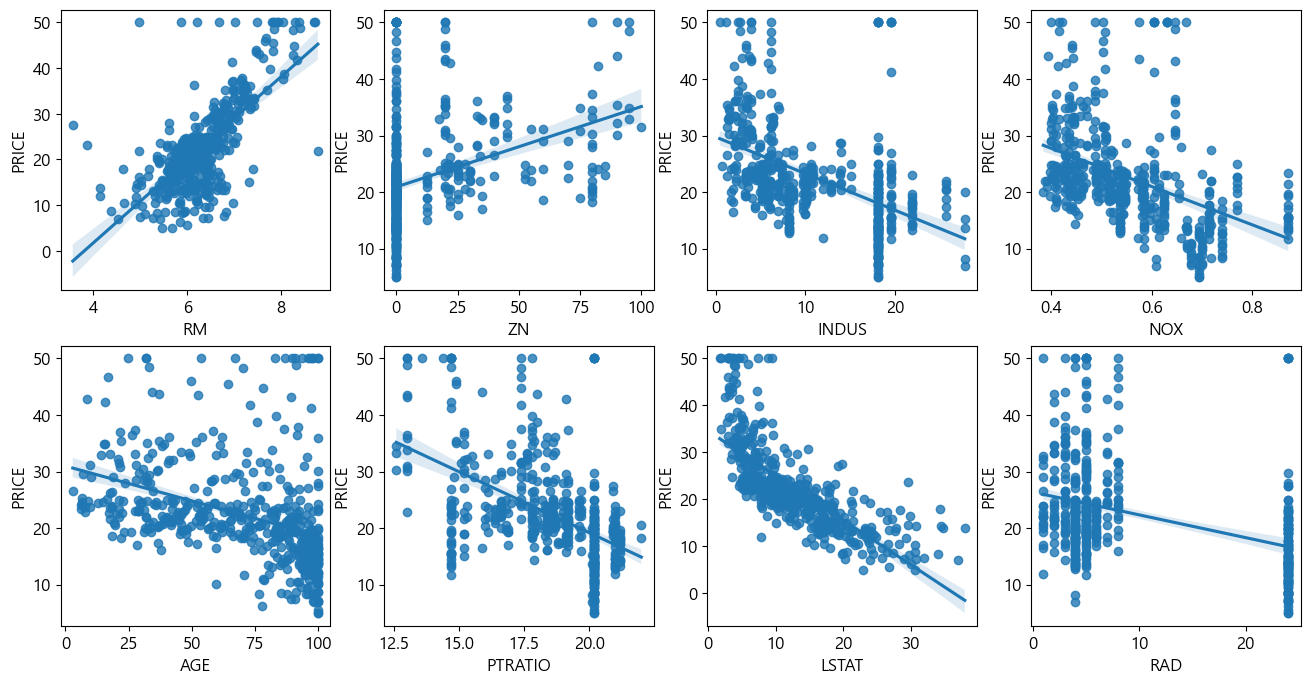

In [10]:
lm_features = ['RM','ZN','INDUS','NOX','AGE', 'PTRATIO','LSTAT','RAD']
fig ,axs = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
for  i ,feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature,y='PRICE', data=bostondf, ax=axs[row][col])

In [11]:
y_target = bostondf['PRICE']
X_data = bostondf.drop(columns='PRICE')
X_train,X_test,y_train,y_test = train_test_split(X_data,
                                                 y_target,
                                                 test_size=0.3,
                                                 random_state=156)

In [12]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_preds)
print(f'mse:{mse:.3f}, rmse:{rmse:.3f}, r2:{r2:.3f}')

mse:17.297, rmse:4.159, r2:0.757


In [13]:
print('절편:',lr.intercept_)
print('회귀계수값:',np.round(lr.coef_,1))

절편: 40.99559517216473
회귀계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [14]:
X_test[:1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
210,0.17446,0.0,10.59,1.0,0.489,5.96,92.1,3.8771,4.0,277.0,18.6,393.25,17.27


In [15]:
y_preds[:1]

array([23.15424087])

In [16]:
coeff = pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [17]:
from sklearn.model_selection import cross_val_score

In [18]:
y = bostondf['PRICE'] 
X = bostondf.drop(columns='PRICE')
lr = LinearRegression()
neg_mse = cross_val_score(lr,X,y,scoring='neg_mean_squared_error',cv=5)

In [19]:
-neg_mse

array([12.46030057, 26.04862111, 33.07413798, 80.76237112, 33.31360656])

In [20]:
np.mean(-neg_mse) #교차검증,mse

37.13180746769912

In [21]:
np.sqrt(np.mean(-neg_mse)) #교차검증,rmse

6.093587405436892

In [22]:
# 릿지 회귀

In [23]:
from sklearn.linear_model import Ridge

In [37]:
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge,
                                 X,
                                 y,
                                 scoring='neg_mean_squared_error',
                                 cv=5)
rmse_scores = np.sqrt(-neg_mse_scores)

In [38]:
-neg_mse_scores

array([11.4217962 , 24.29446706, 28.14355069, 74.59916618, 28.51714218])

In [39]:
rmse_scores

array([3.3796148 , 4.92894178, 5.30504955, 8.63708088, 5.3401444 ])

In [40]:
np.mean(rmse_scores)

5.518166280868961

In [45]:
alphas=[0,0.1,1,10,100]
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge,
                                 X,
                                 y,
                                 scoring='neg_mean_squared_error',
                                 cv=5)
    avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
    print(f'alpha:{alpha} rmse:{avg_rmse}')

alpha:0 rmse:5.828658946215792
alpha:0.1 rmse:5.7884866270323965
alpha:1 rmse:5.652570965613532
alpha:10 rmse:5.518166280868961
alpha:100 rmse:5.329589628472134


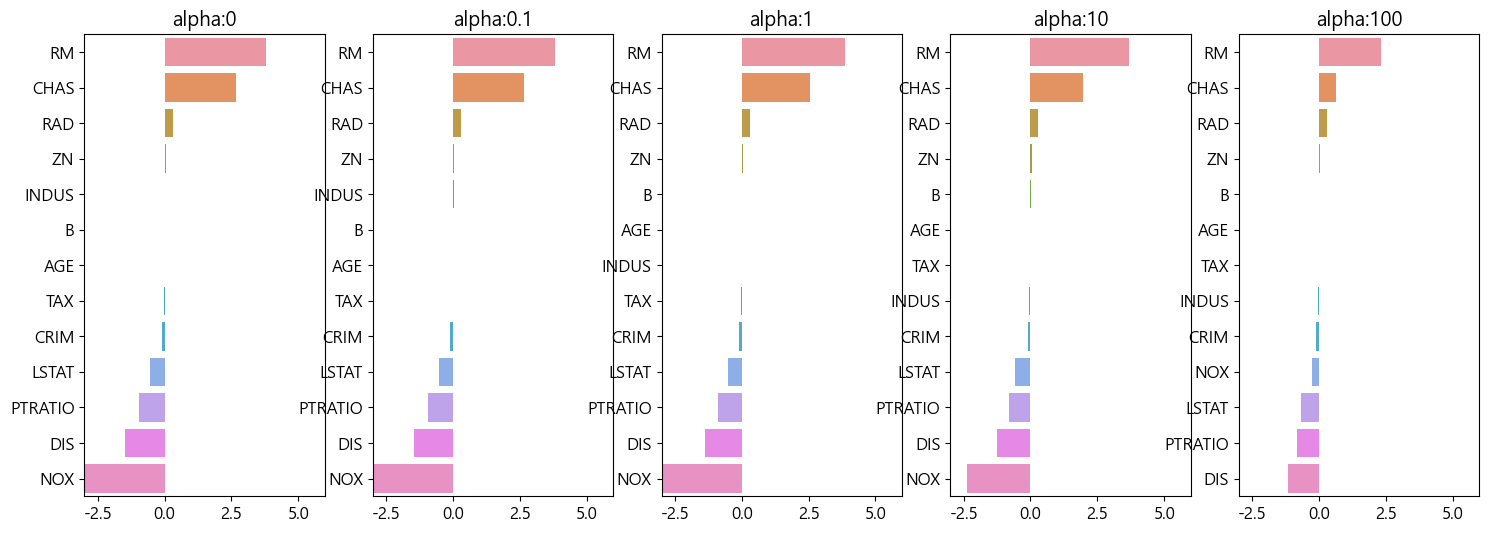

In [49]:
fig, axs = plt.subplots(figsize=(18,6),nrows=1,ncols=5)
coeff_df = pd.DataFrame()
alphas=[0,0.1,1,10,100]
plt.rcParams['axes.unicode_minus'] = False
for pos,alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X,y)
    coeff = pd.Series(data=ridge.coef_,index=X.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname]=coeff
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values,y=coeff.index,ax=axs[pos])
plt.show()

In [51]:
alphas=[0,0.1,1,10,100]
sort_column = 'alpha:'+str(alphas[0])
coeff_df.sort_values(by=sort_column,ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


In [52]:
from sklearn.linear_model import Lasso,ElasticNet

In [78]:
def get_linear_reg_eval(model_name,params=None,X=None,y=None,verbose=True,return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:print('#######',model_name,'######')
    for param in params:
        if model_name == 'Ridge':model = Ridge(alpha=param)
        elif model_name == 'Lasso':model = Lasso(alpha=param)
        elif model_name == 'ElasticNet':model = ElasticNet(alpha=param,l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model,
                                         X,
                                         y,
                                         scoring='neg_mean_squared_error',
                                         cv=5)
        avg_rmse = np.mean(np.sqrt(-neg_mse_scores))
        print(f'alpha {param} rmse:{avg_rmse}')
        model.fit(X,y)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=X.columns)
            colname = 'alpha:'+str(param)
            coeff_df[colname]=coeff
    return coeff_df

In [57]:
lasso_alphas=[0.05,0.07,0.1,0.5,1,3]
coeff_lasso_df = get_linear_reg_eval('Lasso',lasso_alphas,X,y)

####### Lasso ######
alpha 0.05 rmse:5.627585999402109
alpha 0.07 rmse:5.612284267526676
alpha 0.1 rmse:5.615116035266936
alpha 0.5 rmse:5.6691234095948975
alpha 1 rmse:5.776020813823376
alpha 3 rmse:6.1887632108009045


In [59]:
coeff_lasso_df.sort_values(by='alpha:0.05',ascending=False)

,alpha:0.05,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.836618,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.761631,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.271034,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.048826,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010193,0.010248,0.010249,0.009469,0.008247,0.006510
AGE,-0.011858,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014028,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.041355,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098935,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000
LSTAT,-0.553925,-0.560431,-0.568769,-0.656290,-0.761115,-0.807679


In [60]:
elastic_alphas=[0.07,0.1,0.5,1,3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet',elastic_alphas,X,y)

####### ElasticNet ######
alpha 0.07 rmse:5.54165434734814
alpha 0.1 rmse:5.525928496294909
alpha 0.5 rmse:5.466748649445586
alpha 1 rmse:5.596874445109748
alpha 3 rmse:6.068121638621163


In [61]:
coeff_elastic_df.sort_values(by='alpha:0.07',ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


In [62]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures

In [63]:
def get_scaled_data(method='None',p_degree=None,input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)
    return scaled_data

In [79]:
alphas = [0.1,1,10,100]
scale_methods = [(None,None),
                 ('Standard',None),
                 ('Standard',2),
                 ('MinMax',None),
                 ('MinMax',2),
                 ('Log',None)]
for scale_method in scale_methods:
    X_scaled = get_scaled_data(scale_method[0],scale_method[1],X)
    get_linear_reg_eval('Ridge',alphas,X_scaled,y,return_coeff=False)

####### Ridge ######
alpha 0.1 rmse:5.7884866270323965
alpha 1 rmse:5.652570965613532
alpha 10 rmse:5.518166280868961
alpha 100 rmse:5.329589628472134
####### Ridge ######
alpha 0.1 rmse:5.825992799389427
alpha 1 rmse:5.802889517257725
alpha 10 rmse:5.636831222559062
alpha 100 rmse:5.421374711794965
####### Ridge ######
alpha 0.1 rmse:8.827235873001936
alpha 1 rmse:6.871287525963547
alpha 10 rmse:5.484870425533483
alpha 100 rmse:4.634437778261921
####### Ridge ######
alpha 0.1 rmse:5.763570225288305
alpha 1 rmse:5.465045081564941
alpha 10 rmse:5.754163637679424
alpha 100 rmse:7.634919863623537
####### Ridge ######
alpha 0.1 rmse:5.297560003126824
alpha 1 rmse:4.322660371524888
alpha 10 rmse:5.185204257580535
alpha 100 rmse:6.537866889704364
####### Ridge ######
alpha 0.1 rmse:4.770429614681668
alpha 1 rmse:4.676227018966882
alpha 10 rmse:4.836439992635274
alpha 100 rmse:6.2409162327190355
